# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [2]:
df = pd.read_csv("/home/ori/computer_sience/data_science/bank-full_2016.csv")

2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [3]:
print(df.shape)
print(df.columns)
print(df["outcome"].value_counts())
print(df.head())

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default_credit', 'balance',
       'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'days_from_last_contact', 'previous_campaign_contacts',
       'previous_campaign_outcome', 'outcome'],
      dtype='object')
no     39922
yes     5289
Name: outcome, dtype: int64
   age           job  marital  education default_credit  balance housing_loan  \
0   58    management  married   tertiary             no     2143          yes   
1   44    technician   single  secondary             no       29          yes   
2   33  entrepreneur  married  secondary             no        2          yes   
3   47   blue-collar  married    unknown             no     1506          yes   
4   33       unknown   single    unknown             no        1           no   

  personal_loan  contact  day month  duration  campaign  \
0            no  unknown    5   may       261         1   
1            no  unknown    5  

3) What is the data type of each attribute in the table?

In [4]:
df.dtypes

age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object

## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [5]:
df["isContactKnown"] = df["contact"] != "unknown"

2) Change the type of the 'campaign' attribute to Categorical data.

In [6]:
df["campaign"] = df["campaign"].astype("category")

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [7]:
d_df = df.describe()
print (d_df)

                age        balance           day      duration  \
count  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080   
std       10.618762    3044.765829      8.322476    257.527812   
min       18.000000   -8019.000000      1.000000      0.000000   
25%       33.000000      72.000000      8.000000    103.000000   
50%       39.000000     448.000000     16.000000    180.000000   
75%       48.000000    1428.000000     21.000000    319.000000   
max       95.000000  102127.000000     31.000000   4918.000000   

       days_from_last_contact  previous_campaign_contacts  
count             8257.000000                45211.000000  
mean               224.577692                    0.580323  
std                115.344035                    2.303441  
min                  1.000000                    0.000000  
25%                133.000000                    0.000000  
50%                194.000000                

2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

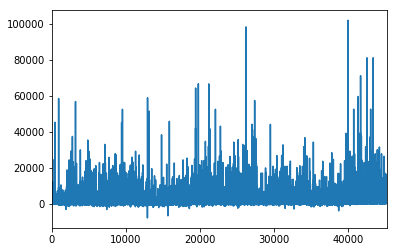

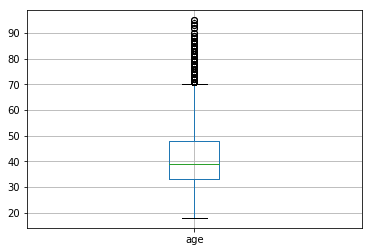

In [8]:
df["balance"].plot()
plt.show()
df.boxplot(column="age")
plt.show()

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

We can see that people with outcome got bigger balance.

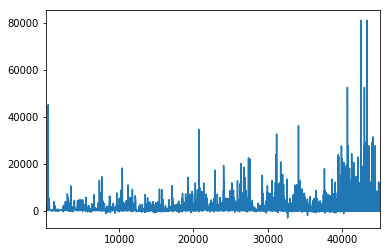

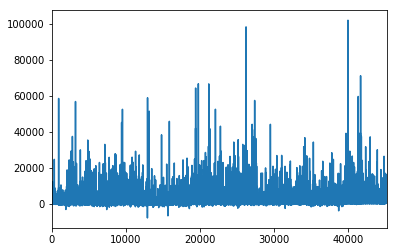

In [9]:
df[df["outcome"]=="yes"]["balance"].plot()
plt.show()
df[df["outcome"]=="no"]["balance"].plot()
plt.show()

# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [10]:
df.isnull().sum()

age                               0
job                               0
marital                           0
education                         0
default_credit                    0
balance                           0
housing_loan                      0
personal_loan                     0
contact                           0
day                               0
month                             0
duration                          0
campaign                          0
days_from_last_contact        36954
previous_campaign_contacts        0
previous_campaign_outcome         0
outcome                           0
isContactKnown                    0
dtype: int64

2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [11]:
df2 = df[df["isContactKnown"] == False]

In [12]:
df2.head()

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False


3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

The meaning of that column is the amount of days passed since the previous contact
we can see that when days_from_last_contact is NaN then previous_campaign_contacts is unknown and previous_campaign_contacts is 0.

In [13]:
print(df[df["days_from_last_contact"].isnull()]["previous_campaign_outcome"].unique(), 
      df[df["days_from_last_contact"].isnull()]["previous_campaign_contacts"].unique())

['unknown'] [0]


## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

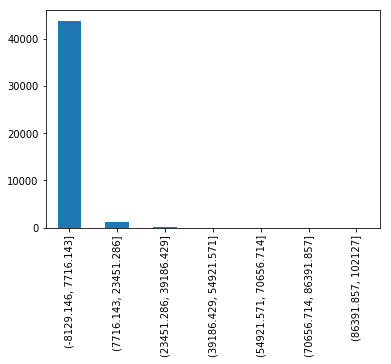

In [14]:
pd.cut(df["balance"], 7).value_counts().plot(kind="bar")

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

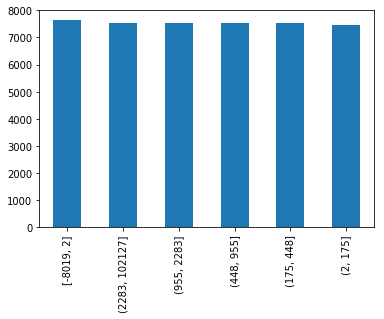

In [15]:
pd.qcut(df["balance"], 6).value_counts().plot(kind="bar")

3) Propose a way to further discretize the Month column.

You can turn the least common values into 1 bin (Others)

In [16]:
freq = df["month"].value_counts()
df["month"] = df["month"].apply(lambda x: x if freq[x] >= 1000 else "Others")

# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [17]:
df[["balance", "age"]].corr("pearson")

,balance,age
balance,1.000000,0.097783
age,0.097783,1.000000


In [18]:
df[["balance", "age"]].corr("spearman")

,balance,age
balance,1.00000,0.09638
age,0.09638,1.00000


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [19]:
df[["age", "balance", "day", "duration", "days_from_last_contact", "previous_campaign_contacts"]].corr("pearson")

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
age,1.000000,0.097783,-0.009120,-0.004648,-0.107863,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.108122,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,-0.090095,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.024407,0.001203
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,1.000000,-0.021885
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.021885,1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [20]:
def shannon(col):
    entropy = - sum([ p * math.log(p) / math.log(2.0) for p in col])
    return entropy

entr = list()
for column in df.columns:
    entr.append((column, shannon(df[column].value_counts())))
 
from pprint import pprint
pprint (sorted(entr, key=lambda x: -x[1]))

[('days_from_last_contact', -39847.265206740813),
 ('balance', -191111.01130051768),
 ('duration', -278075.77077378548),
 ('age', -458639.40999669948),
 ('day', -480396.69425827061),
 ('job', -561024.80117326835),
 ('month', -570143.35666399857),
 ('campaign', -584170.83620583126),
 ('education', -626149.03063105384),
 ('marital', -639695.67284381681),
 ('previous_campaign_contacts', -645114.55595380045),
 ('contact', -645923.26469330967),
 ('housing_loan', -654356.94917708286),
 ('previous_campaign_outcome', -656796.97335833532),
 ('isContactKnown', -660003.04998904676),
 ('personal_loan', -670458.11068001972),
 ('outcome', -675622.10669788602),
 ('default_credit', -693273.34052653878)]


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [21]:
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

bins = 5
columns = set(df.columns) - {"outcome"}
mutual_information = dict()
df1 = df.fillna(df.mean())
for column in columns:
    mutual_information[column] = calc_MI(df1.groupby("outcome")["outcome"].transform('count'), 
                                         df1.groupby(column)[column].transform('count'), bins)
max(mutual_information.items(), key=lambda x: x[1])

('duration', 0.050623386852932981)

# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

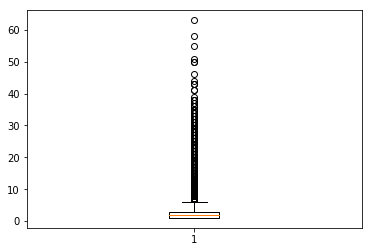

In [22]:
plt.boxplot(df["campaign"])
plt.show()

## Normalization

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

We can notice that the values of "days_from_last_contact" are between 0 to ~400, and there are few values that between ~400 and 871. therefore, we can normalize the column from 0-400 to 0-1
and treat the values between ~400 to 871 as exceptionals

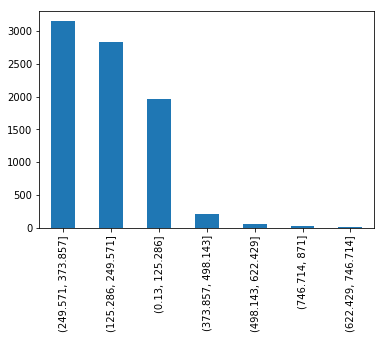

In [23]:
pd.cut(df["days_from_last_contact"], 7).value_counts().plot(kind="bar")

In [24]:
from sklearn import preprocessing
x = pd.DataFrame(df["days_from_last_contact"])
x.fillna(x.mean(), inplace=True)
x[x > 400] = x.values.mean()
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df["days_from_last_contact"] = x_scaled.flatten()